# Tutorial 1: Word Embeddings
## Set-Up
1. Follow the instructions [here](https://github.com/alligilmore-sum/sum_data_science/blob/master/setup_instructions.md) if you haven't already.
2. Open your Terminal and run: `pip install spacy`

## References
[spacy documentation](https://spacy.io/docs/usage/word-vectors-similarities)

[GloVe paper](https://nlp.stanford.edu/pubs/glove.pdf)

In [4]:
import spacy
import numpy as np

In [ ]:
spacy.load

In [7]:
nlp = spacy.load("en_vectors_glove_md")

# See the vectors
1. Try tab-completion on the objects below.
2. Define objects for your own words.

In [8]:
nlp.vocab[111111].orth_

u'mega-operas'

In [9]:
apples, lions, oranges = nlp(u'apples'), nlp(u'lions'), nlp(u'oranges')

In [10]:
apples.vector.shape

(300,)

In [11]:
apples.vector

array([-0.63340002,  0.18980999, -0.53544003, -0.52657998, -0.30001   ,
        0.30559   , -0.49303001,  0.14636   ,  0.012273  ,  0.96802002,
        0.0040354 ,  0.25233999, -0.29864001, -0.014646  , -0.24905001,
       -0.67124999, -0.053366  ,  0.59425998, -0.068034  ,  0.10315   ,
        0.66759002,  0.024617  , -0.37548   ,  0.52556998,  0.054449  ,
       -0.36748001, -0.28013   ,  0.090898  , -0.025687  , -0.59469998,
       -0.24269   ,  0.28602999,  0.68599999,  0.29736999,  0.30421999,
        0.69032001,  0.042784  ,  0.023701  , -0.57165003,  0.70581001,
       -0.20813   , -0.03204   , -0.12494   , -0.42932999,  0.31270999,
        0.30351999,  0.09421   , -0.15493   ,  0.071356  ,  0.15022001,
       -0.41791999,  0.066394  , -0.034546  , -0.45772001,  0.57177001,
       -0.82754999, -0.27884999,  0.71801001, -0.12425   ,  0.18550999,
        0.41341999, -0.53996998,  0.55864   , -0.015805  , -0.1074    ,
       -0.29980999, -0.17271   ,  0.27066001,  0.043996  ,  0.60

# Measure Cosine Similarity
1. Check that the similarity method is computing cosine similarity from the expected definition.
2. Try measuring similarity of some familiar words to convince yourself that cosine similarity captures semantic similarity in this vector space.

In [12]:
apples_dot_oranges = np.dot(apples.vector, oranges.vector)
apples_dot_apples = np.dot(apples.vector, apples.vector)
oranges_dot_oranges = np.dot(oranges.vector, oranges.vector)
apples_dot_oranges/(np.sqrt(apples_dot_apples)*np.sqrt(oranges_dot_oranges))

0.77809423

In [13]:
apples.similarity(oranges)
# Notice the difference in precision

0.77809419767910315

In [14]:
apples.similarity(nlp(u'fish'))

0.36175017677213472

In [15]:
lions, tigers, bears, pianos = nlp(u'lions tigers bears pianos')

In [16]:
lions.similarity(tigers)

0.78141754865161506

In [17]:
lions.similarity(pianos)

0.11503108707545992

# Find Similar Words
1. Try the most_similar_to_word() and least_similar_to_word() functions below on your own sample words.
2. Modify these functions to return a specified number of similar words using a new argument called "top_n".
3. Run some experiments to see how well the embedding handles words with ambiguous meanings.
4. Run some experiments to see how well the embedding handles words from specialized vocabularies

In [18]:
all_words = [w for w in nlp.vocab if w.orth_.islower()]

In [19]:
def most_similar_to_word(target_word, vocab=[w for w in nlp.vocab if w.orth_.islower()]):
    """Find the top_n most similar words to target_word in vocab.
        target_word : str
        vocab : list
        top_n : int"""
    vocab.sort(key=lambda x: x.similarity(nlp(unicode(target_word))))
    vocab.reverse()
    print "Top %d most similar words to %s:" % (10, target_word)
    # ignore the first when taking top n, since a word is most similar to itself
    for word in vocab[1:11]:   
        print(word.orth_)
#     return vocab[1:11]

def least_similar_to_word(target_word, vocab=[w for w in nlp.vocab if w.orth_.islower()]):
    """Find the top_n most similar words to target_word in vocab.
        target_word : str
        vocab : list
        top_n : int"""
    vocab.sort(key=lambda x: x.similarity(nlp(unicode(target_word))))
    print "Top %d least similar words to %s:" % (10, target_word)
    for word in vocab[:10]:   
        print(word.orth_)
#     return vocab[:10]

In [21]:
# Some experiments
most_similar_to_word(u'apples', all_words)
print '\n'
least_similar_to_word(u'apples', all_words)

Top 10 most similar words to apples:
pears
peaches
oranges
strawberries
cherries
apple
bananas
carrots
apricots
plums


Top 10 least similar words to apples:
incivil
bkm
leporello
neo-modern
extraordinario
responsum
crime-plagued
homofobia
320d
dymanic


# Word Vector Arithmetic
In this section we'll test the much-advertised "king - man + woman = queen" equation that GloVe vectors satisfy.

1. The functions below modify the most_similar_to_word() and least_similar_to_word() functions to accept any 300-dimensional vector as input. Why is this necessary?
2. Use these functions to test vector arithmetic with some of your sample words. 
3. Can you identify semantic regularities the vector space captures and does not capture? Some ideas: plurals, adjectives vs. adverbs, opposites, analogies. Why does it capture some of these better than others?

In [22]:
from sklearn.metrics.pairwise import cosine_similarity as cs

def cosine_similarity(a, b):
    return cs(a.reshape(1, -1), b.reshape(1, -1))

def most_similar(target, vocab=[w for w in nlp.vocab if w.orth_.islower()], top_n=10):
    """Find the top_n most similar words to target_vector in vocab.
        target_vector : string, unicode, or 300-dimensional vector
        vocab : list
        top_n : int"""
    if type(target) in [str, unicode]:
        target_vector = nlp(unicode(target)).vector
    else:
        target_vector = target
    vocab.sort(key=lambda x: cosine_similarity(x.vector, target_vector))
    vocab.reverse()
    print "Top %d most similar words to target:" % top_n
    for word in vocab[1:top_n+1]:   
        print(word.orth_, cosine_similarity(word.vector, target_vector), cosine_similarity(word.vector, target_vector))
    return vocab[1:top_n+1]

def least_similar(target, vocab=[w for w in nlp.vocab if w.orth_.islower()], top_n=10):
    """Find the top_n most similar words to target_word in vocab.
        target_vector : string, unicode, or 300-dimensional vector
        vocab : list
        top_n : int"""
    if type(target) in [str, unicode]:
        target_vector = nlp(unicode(target)).vector
    else:
        target_vector = target
    vocab.sort(key=lambda x: cosine_similarity(x.vector, target_vector))
    print "Top %d least similar words to target:" % top_n
    for word in vocab[:top_n]:   
        print(word.orth_, cosine_similarity(word.vector, target_vector), cosine_similarity(word.vector, target_vector))
    return vocab[:top_n]

In [25]:
most_similar(apples.vector + oranges.vector, all_words, 10)

Top 10 most similar words to target:
(u'apples', array([[ 0.94244021]], dtype=float32), array([[ 0.94244021]], dtype=float32))
(u'pears', array([[ 0.85608822]], dtype=float32), array([[ 0.85608822]], dtype=float32))
(u'peaches', array([[ 0.83956474]], dtype=float32), array([[ 0.83956474]], dtype=float32))
(u'apricots', array([[ 0.79975736]], dtype=float32), array([[ 0.79975736]], dtype=float32))
(u'strawberries', array([[ 0.7976824]], dtype=float32), array([[ 0.7976824]], dtype=float32))
(u'bananas', array([[ 0.79656762]], dtype=float32), array([[ 0.79656762]], dtype=float32))
(u'cherries', array([[ 0.788369]], dtype=float32), array([[ 0.788369]], dtype=float32))
(u'plums', array([[ 0.78505248]], dtype=float32), array([[ 0.78505248]], dtype=float32))
(u'lemons', array([[ 0.7824955]], dtype=float32), array([[ 0.7824955]], dtype=float32))
(u'carrots', array([[ 0.75350755]], dtype=float32), array([[ 0.75350755]], dtype=float32))


In [26]:
most_similar(nlp(u'king').vector - nlp(u'man').vector + nlp(u'woman').vector, all_words, 10)

Top 10 most similar words to target:
(u'queen', array([[ 0.78808445]], dtype=float32), array([[ 0.78808445]], dtype=float32))
(u'prince', array([[ 0.64010781]], dtype=float32), array([[ 0.64010781]], dtype=float32))
(u'kings', array([[ 0.62085444]], dtype=float32), array([[ 0.62085444]], dtype=float32))
(u'princess', array([[ 0.61256361]], dtype=float32), array([[ 0.61256361]], dtype=float32))
(u'royal', array([[ 0.58009714]], dtype=float32), array([[ 0.58009714]], dtype=float32))
(u'throne', array([[ 0.57870132]], dtype=float32), array([[ 0.57870132]], dtype=float32))
(u'queens', array([[ 0.57437944]], dtype=float32), array([[ 0.57437944]], dtype=float32))
(u'monarch', array([[ 0.56336224]], dtype=float32), array([[ 0.56336224]], dtype=float32))
(u'kingdom', array([[ 0.5520981]], dtype=float32), array([[ 0.5520981]], dtype=float32))
(u'empress', array([[ 0.52895302]], dtype=float32), array([[ 0.52895302]], dtype=float32))


# Visualization
This section contains a few functions that allow you to plot a dimensionally-reduced version of the word embedding space.

1. Plot the neighborhoods of some of your sample words.
2. Plot lists of words that showcase the semantic regularities you experimented with in the prior section.

In [28]:
from sklearn.decomposition import PCA
import seaborn as sns
sns.set_style("ticks")
sns.set_style("darkgrid")
import pandas as pd
%matplotlib inline

In [29]:
def pca_plot_word_vectors(word_list):
    word_vectors = [nlp(unicode(word)).vector for word in word_list]
    pca = PCA(n_components=2)
    word_vectors_pca = pca.fit_transform(word_vectors)
    word_vectors_pca = np.c_[word_list, word_vectors_pca]
    words_pca = pd.DataFrame(word_vectors_pca, columns=['word', 'pca_1', 'pca_2']).set_index('word')
    words_pca['pca_1'] = words_pca['pca_1'].apply(float)
    words_pca['pca_2'] = words_pca['pca_2'].apply(float)
    ax = sns.regplot('pca_1', 'pca_2',
               data=words_pca,
               fit_reg=False,
               scatter_kws={"marker": "D",
                           "s": 100},
    )

    for word in words_pca.index:
        ax.text(words_pca.loc[word, 'pca_1'] + .1, words_pca.loc[word, 'pca_2'], word)

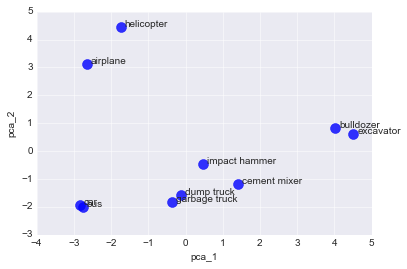

In [30]:
trucks = ['dump truck', 'garbage truck', 'cement mixer', 'excavator', 'impact hammer', 'bus', 'bulldozer', 'car', 'airplane', 'helicopter']
pca_plot_word_vectors(trucks)

In [31]:
def plot_nearest_neighbors(word, num_neighbors=10):
    words_to_plot = [word] + [neighbor.orth_ for neighbor in most_similar(word, all_words, num_neighbors)]
    pca_plot_word_vectors(words_to_plot)

Top 20 most similar words to target:
(u'trucks', array([[ 0.85988706]], dtype=float32), array([[ 0.85988706]], dtype=float32))
(u'vehicle', array([[ 0.71318042]], dtype=float32), array([[ 0.71318042]], dtype=float32))
(u'car', array([[ 0.71134382]], dtype=float32), array([[ 0.71134382]], dtype=float32))
(u'tractor', array([[ 0.7091555]], dtype=float32), array([[ 0.7091555]], dtype=float32))
(u'tow', array([[ 0.69178855]], dtype=float32), array([[ 0.69178855]], dtype=float32))
(u'cars', array([[ 0.67799246]], dtype=float32), array([[ 0.67799246]], dtype=float32))
(u'pickup', array([[ 0.67722225]], dtype=float32), array([[ 0.67722225]], dtype=float32))
(u'vehicles', array([[ 0.67306304]], dtype=float32), array([[ 0.67306304]], dtype=float32))
(u'towing', array([[ 0.65463251]], dtype=float32), array([[ 0.65463251]], dtype=float32))
(u'cab', array([[ 0.64275801]], dtype=float32), array([[ 0.64275801]], dtype=float32))
(u'jeep', array([[ 0.62849015]], dtype=float32), array([[ 0.62849015]], 

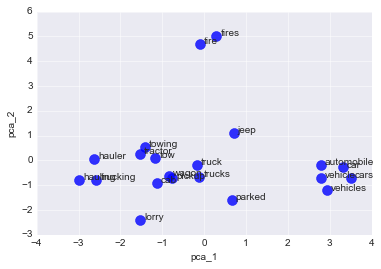

In [32]:
plot_nearest_neighbors('truck', 20)

In [ ]:
def pairplot_word_list(word_list, pca_comps):
    word_vectors = [nlp(unicode(word)).vector for word in word_list]
    pca = PCA(n_components=pca_comps)
    word_vectors_pca = pca.fit_transform(word_vectors)
    word_vectors_pca = np.c_[word_list, word_vectors_pca]
    words_pca = pd.DataFrame(word_vectors_pca, columns=['word'] + ['pca_' + str(x) for x in range(1,pca_comps+1)]).set_index('word')
    for col in words_pca.columns:
        words_pca[col] = words_pca[col].apply(float)
    plotgrid = sns.pairplot(words_pca, size=4, plot_kws={"s": 80})
    text_offset = .1
    for i in range(len(plotgrid.axes)):
        for j in range(len(plotgrid.axes)):
            if i != j:
                for word in words_pca.index:
                    plotgrid.axes[i][j].text(words_pca.loc[word, 'pca_' + str(j+1)] + text_offset, words_pca.loc[word, 'pca_' + str(i+1)], word)

In [ ]:
pairplot_word_list(trucks, 3)